
Call:
lm(formula = var_tot$Var_M1 ~ var_tot$Var_M2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5697 -0.2904  0.0139  0.2810  5.5333 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.07236    0.01661  -4.357 1.38e-05 ***
var_tot$Var_M2  1.62538    0.06723  24.178  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6637 on 2063 degrees of freedom
Multiple R-squared:  0.2208,	Adjusted R-squared:  0.2204 
F-statistic: 584.6 on 1 and 2063 DF,  p-value: < 2.2e-16


      Data                Var_M1            Var_M2         
 Min.   :1980-11-10   Min.   :-7.1221   Min.   :-1.525848  
 1st Qu.:1990-10-01   1st Qu.:-0.2336   1st Qu.: 0.009684  
 Median :2000-08-21   Median : 0.1131   Median : 0.106571  
 Mean   :2000-08-21   Mean   : 0.1187   Mean   : 0.117572  
 3rd Qu.:2010-07-12   3rd Qu.: 0.4417   3rd Qu.: 0.203617  
 Max.   :2020-06-01   Max.   : 9.6749   Max.   : 3.138279  

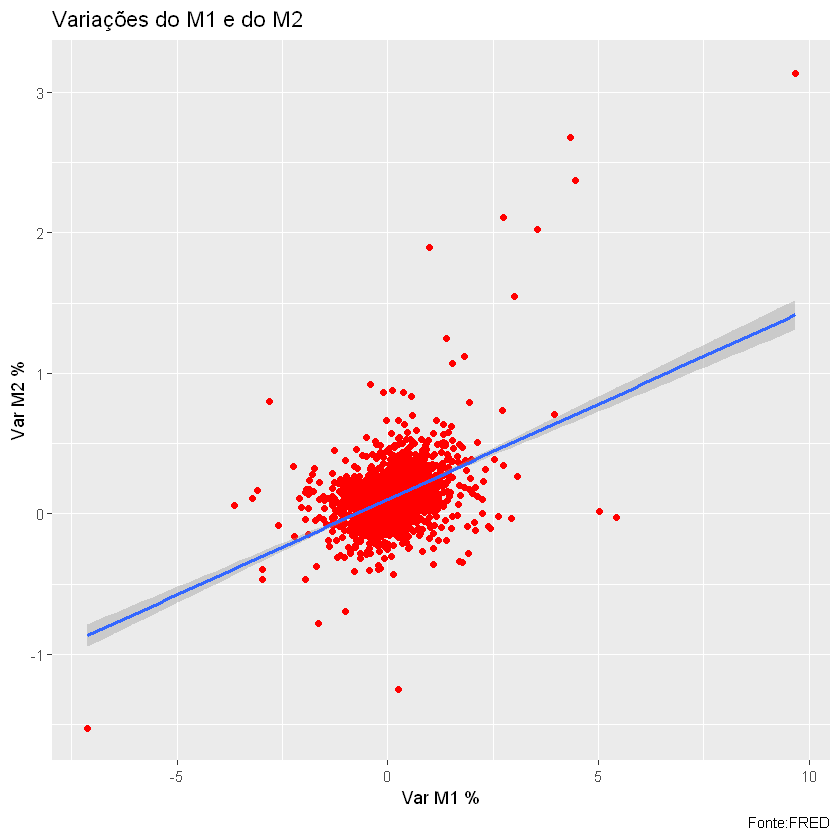

In [3]:
library(fredr)
library(ggplot2)
fredr_set_key("a1e53d11bf4cb319624da39b894a79e6")
mult <- fredr("MULT")
m1_stock <- fredr("M1", observation_start = as.Date("1980-11-03"), frequency = "w")
m2_stock <- fredr("M2", frequency = "w")
varm2 <- (diff(m2_stock$value,1)/m2_stock$value[2:2066])*100
varm1 <- (diff(m1_stock$value, 1)/m1_stock$value[2:2066])*100
datas <- seq(as.Date("1980-11-10"), as.Date("2020-06-01"), "1 week")
var_tot <- data.frame(Data = datas, Var_M1 = varm1, Var_M2 = varm2)
ggplot(var_tot, aes(x = Var_M1, y = Var_M2))+
  geom_point(colour = "red")+
  geom_smooth(formula = y ~ x, method = "lm")+
  labs(x = "Var M1 %", y = "Var M2 %", title = "Variações do M1 e do M2",
       caption = "Fonte:FRED")
regressao <- lm(var_tot$Var_M1 ~ var_tot$Var_M2)
summary(regressao)